# Approach
-  Reading the data
-  Data Cleaning
-  Exploratory Data Analysis
-  Dropping unnecessory variables/columns
-  Dummy variables creation
-  Train Test split
-  Feature Scaling
-  Correlation analysis
-  Model Building
   -  Using RFE
   -  ROC Curve
   -  Presition Recall curve
-  Final Model with test set
-  Getting Accuracy,Precision, Sensitivity, Specitivity



In [1]:
# Importing Lybraries
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve



In [3]:
pd.set_option('display.max_columns',None)

In [4]:
leads_df=pd.read_csv('Leads.csv')

In [5]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
leads_df.shape

(9240, 37)

In [7]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
round(leads_df.isnull().sum()/len(leads_df),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
Specialization                                   0.16
How did you hear about X Education               0.24
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

In [10]:
# converting yes/no to 1 & 0
labels=['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper',
        'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
        'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
        'A free copy of Mastering The Interview']
def map_label(x):
    return x.map({'Yes':1,'No':0})
leads_df[labels]=leads_df[labels].apply(map_label)


In [11]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [12]:
for i in leads_df.iloc[:,1:].select_dtypes(include='object').columns:
    print(i)
    print('-'*50)
    print(leads_df[i].value_counts(normalize=True))
    print('-'*50)

Lead Origin
--------------------------------------------------
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
--------------------------------------------------
Lead Source
--------------------------------------------------
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM   

In [13]:
# conevrting select inot np.nan
leads_df=leads_df.replace('Select',np.nan)

In [14]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,NaN,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,NaN,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [15]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [16]:
leads_df.columns[round(leads_df.isnull().sum()/len(leads_df),2)>0.7]
round(leads_df.isnull().sum()/len(leads_df),2).sort_values(ascending=False)

How did you hear about X Education               0.78
Lead Profile                                     0.74
Lead Quality                                     0.52
Asymmetrique Profile Score                       0.46
Asymmetrique Activity Score                      0.46
Asymmetrique Profile Index                       0.46
Asymmetrique Activity Index                      0.46
City                                             0.40
Specialization                                   0.37
Tags                                             0.36
What matters most to you in choosing a course    0.29
What is your current occupation                  0.29
Country                                          0.27
Last Activity                                    0.01
Page Views Per Visit                             0.01
TotalVisits                                      0.01
Receive More Updates About Our Courses           0.00
I agree to pay the amount through cheque         0.00
Get updates on DM Content   

In [17]:
# columns with more than 70% of missing values
leads_df.columns[round(leads_df.isnull().sum()/len(leads_df),2)>0.7]

Index(['How did you hear about X Education', 'Lead Profile'], dtype='object')

In [18]:
for i in leads_df.columns[round(leads_df.isnull().sum()/len(leads_df),2)>0.7]:
    print(i)
    print(leads_df[i].value_counts())
    print('-'*50)

How did you hear about X Education
Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64
--------------------------------------------------
Lead Profile
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64
--------------------------------------------------


In [19]:
# as more thyan 70% of missing values in columns ['How did you hear about X Education', 'Lead Profile'], so dropping this columns

In [20]:
leads_df=leads_df.drop(leads_df.loc[:,list(round(leads_df.isnull().sum()/len(leads_df),2)>0.7)].columns,axis=1)

In [21]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [22]:
leads_df['Lead Quality'].value_counts(normalize=True)

Might be             0.348759
Not Sure             0.244131
High in Relevance    0.142410
Worst                0.134362
Low in Relevance     0.130338
Name: Lead Quality, dtype: float64

In [23]:
# updating missing values (np.nan) of Lead Quality by Not Sure
leads_df['Lead Quality']=leads_df['Lead Quality'].replace(np.nan,'Not Sure')

In [24]:
leads_df['Lead Quality'].value_counts(normalize=True)

Not Sure             0.634091
Might be             0.168831
High in Relevance    0.068939
Worst                0.065043
Low in Relevance     0.063095
Name: Lead Quality, dtype: float64

In [25]:
for i in leads_df[['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index']]:
    print(i)
    print(leads_df[i].value_counts())
    print('-'*50)

Asymmetrique Profile Score
15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64
--------------------------------------------------
Asymmetrique Activity Score
14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64
--------------------------------------------------
Asymmetrique Profile Index
02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64
--------------------------------------------------
Asymmetrique Activity Index
02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64
--------------------------------------------------


'Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index' columns have 46% missing data and we can not impute any value, so it is better to drop these columns

In [26]:
leads_df=leads_df.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index'],axis=1)

In [27]:
leads_df['City'].value_counts(normalize=True)

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64

City has 40% missing values, but maximum entries have city name as Mumbai, so imputing missing values with 'Mumbai'

In [28]:
leads_df['City']=leads_df['City'].replace(np.nan,'Mumbai')

In [29]:
leads_df['Specialization'].value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

As this column has categorical entries, so it is better to replace nan with Other_specialization

In [30]:
leads_df['Specialization']=leads_df['Specialization'].replace(np.nan,'Other_Specialization')

In [31]:
leads_df['Tags'].value_counts(normalize=True)

Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in touch

Replacing Nan values with 'Will revert after reading the email '

In [32]:
leads_df['Tags']=leads_df['Tags'].replace(np.nan,'Will revert after reading the email')

In [33]:
leads_df['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

In [34]:
# Replacing nan values with 'Better Career Prospects'
leads_df['What matters most to you in choosing a course']=leads_df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [35]:
leads_df['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

Maximum entries are 'Unemployed', so replacing nan values with 'Unemployed'

In [36]:
leads_df['What is your current occupation']=leads_df['What is your current occupation'].replace(np.nan,'Unemployed')

In [37]:
leads_df['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

Maximum entries are 'India', so replacing nan values with 'India'

In [38]:
leads_df['Country']=leads_df['Country'].replace(np.nan,'India')

In [39]:
leads_df['Last Activity'].value_counts(normalize=True)

Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Received                  0.000219
Email Marked Spam               0.000219
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: Last Activity, dtype: float64

Replacing nan values with 'Email Opened'

In [40]:
leads_df['Last Activity']=leads_df['Last Activity'].replace(np.nan,'Email Opened')

In [41]:
leads_df['Page Views Per Visit'].value_counts(normalize=True)

0.00    0.240470
2.00    0.197188
3.00    0.131385
4.00    0.098429
1.00    0.071515
          ...   
3.43    0.000110
2.56    0.000110
6.33    0.000110
1.64    0.000110
2.08    0.000110
Name: Page Views Per Visit, Length: 114, dtype: float64

Repalcing nan values with 0.00

In [42]:
leads_df['Page Views Per Visit']=leads_df['Page Views Per Visit'].replace(np.nan,0.00)

In [43]:
leads_df['TotalVisits'].value_counts(normalize=True)

0.0      0.240470
2.0      0.184555
3.0      0.143469
4.0      0.123036
5.0      0.086016
6.0      0.051192
1.0      0.043392
7.0      0.033945
8.0      0.024607
9.0      0.018016
10.0     0.012523
11.0     0.009447
13.0     0.005273
12.0     0.004943
14.0     0.003955
16.0     0.002307
15.0     0.001977
17.0     0.001758
18.0     0.001648
20.0     0.001318
19.0     0.000989
21.0     0.000659
23.0     0.000659
24.0     0.000549
25.0     0.000549
27.0     0.000549
22.0     0.000330
29.0     0.000220
28.0     0.000220
26.0     0.000220
141.0    0.000110
55.0     0.000110
30.0     0.000110
43.0     0.000110
74.0     0.000110
41.0     0.000110
54.0     0.000110
115.0    0.000110
251.0    0.000110
32.0     0.000110
42.0     0.000110
Name: TotalVisits, dtype: float64

Repalcing nan values with 0.00

In [44]:
leads_df['TotalVisits']=leads_df['TotalVisits'].replace(np.nan,0.00)

In [45]:
# drpping other nan values
leads_df.dropna(inplace=True)

In [46]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9204 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9204 non-null   object 
 1   Lead Number                                    9204 non-null   int64  
 2   Lead Origin                                    9204 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9204 non-null   int64  
 5   Do Not Call                                    9204 non-null   int64  
 6   Converted                                      9204 non-null   int64  
 7   TotalVisits                                    9204 non-null   float64
 8   Total Time Spent on Website                    9204 non-null   int64  
 9   Page Views Per Visit                           9204 

In [47]:
# Checking for data imbalance in Target column (Converted)
leads_df['Converted'].value_counts(normalize=True)

0    0.616254
1    0.383746
Name: Converted, dtype: float64

## Exploratory Data Analysis

<AxesSubplot:xlabel='Converted', ylabel='count'>

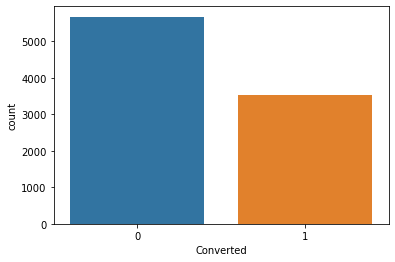

In [48]:
# overall conversion rate
sns.countplot(x='Converted',data=leads_df)

[]

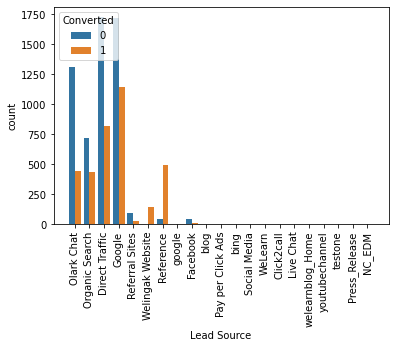

In [49]:
# sns.countplot(x=[['Lead Source', 'Lead Origin']],hue='Converted',data=leads_df)
sns.countplot(x='Lead Source',hue='Converted',data=leads_df)
plt.xticks(rotation=90)
plt.plot()

In [50]:
leads_df['Lead Source'].value_counts(normalize=True)

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64

In [51]:
# Correction from google to Google
leads_df['Lead Source']=leads_df['Lead Source'].replace('google',"Google")

In [52]:
leads_df['Lead Source'].value_counts(normalize=True)

Google               0.312147
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
Click2call           0.000435
Social Media         0.000217
Live Chat            0.000217
Press_Release        0.000217
Pay per Click Ads    0.000109
blog                 0.000109
WeLearn              0.000109
welearnblog_Home     0.000109
youtubechannel       0.000109
testone              0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64

In [53]:
leads_df.groupby('Converted')['Lead Source'].value_counts(normalize=True)

Converted  Lead Source      
0          Google               0.304302
           Direct Traffic       0.304126
           Olark Chat           0.230430
           Organic Search       0.126587
           Referral Sites       0.016573
           Reference            0.007757
           Facebook             0.007405
           bing                 0.000882
           Press_Release        0.000353
           Welingak Website     0.000353
           Click2call           0.000176
           Pay per Click Ads    0.000176
           Social Media         0.000176
           blog                 0.000176
           testone              0.000176
           welearnblog_Home     0.000176
           youtubechannel       0.000176
1          Google               0.324745
           Direct Traffic       0.231597
           Reference            0.138732
           Olark Chat           0.126840
           Organic Search       0.123443
           Welingak Website     0.039638
           Referral Sites   

### almost 95% of Conversion rate are from top 6 Lead Sources, so converting all others in name 'Other_Sources'

In [54]:
print(list(leads_df['Lead Source'].unique()))

['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google', 'Referral Sites', 'Welingak Website', 'Reference', 'Facebook', 'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release', 'NC_EDM']


In [55]:
# converting name to Other_Souces for the smaller percentage catagories
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other_Sources')

[]

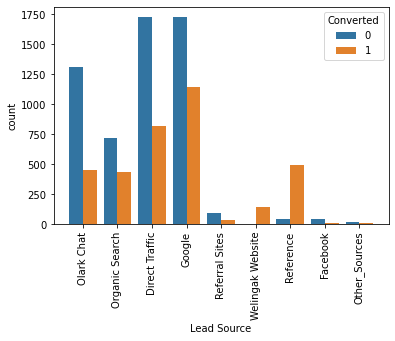

In [56]:
sns.countplot(x='Lead Source',hue='Converted',data=leads_df)
plt.xticks(rotation=90)
plt.plot()

In [57]:
leads_df.groupby('Converted')['Lead Source'].value_counts(normalize=True)

Converted  Lead Source     
0          Google              0.304302
           Direct Traffic      0.304126
           Olark Chat          0.230430
           Organic Search      0.126587
           Referral Sites      0.016573
           Reference           0.007757
           Facebook            0.007405
           Other_Sources       0.002468
           Welingak Website    0.000353
1          Google              0.324745
           Direct Traffic      0.231597
           Reference           0.138732
           Olark Chat          0.126840
           Organic Search      0.123443
           Welingak Website    0.039638
           Referral Sites      0.008777
           Facebook            0.003681
           Other_Sources       0.002548
Name: Lead Source, dtype: float64

## Observatons
    1) Google & Direct Traffic have highest conversion rates (32% & 23% respectively
    2) Reference , Olark Chat, Organic Search and Welingak Website have less counts but conversion rates are high.
 ### So we have to focus on Google, Direct Traffic,Reference , Olark Chat, Organic Search and Welingak Website to increase the conversion rates

[]

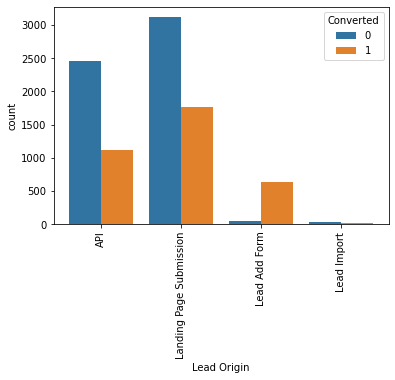

In [58]:
sns.countplot(x='Lead Origin',hue='Converted',data=leads_df)
plt.xticks(rotation=90)
plt.plot()

In [59]:
leads_df.groupby('Converted')['Lead Origin'].value_counts(normalize=True)

Converted  Lead Origin            
0          Landing Page Submission    0.549718
           API                        0.434591
           Lead Add Form              0.008463
           Lead Import                0.007228
1          Landing Page Submission    0.500283
           API                        0.315685
           Lead Add Form              0.180351
           Lead Import                0.003681
Name: Lead Origin, dtype: float64

In [60]:
leads_df.groupby('Lead Origin')['Converted'].value_counts()

Lead Origin              Converted
API                      0            2465
                         1            1115
Landing Page Submission  0            3118
                         1            1767
Lead Add Form            1             637
                         0              48
Lead Import              0              41
                         1              13
Name: Converted, dtype: int64

## Observation
    Landing Page Submission & API have conversion rate more than 30 % ( 50% & 31% respectively).
    Lead Add Form has low counts but conversion rate in high as compare to counts.
    So we have to focus on Landing Page Submission & API & Lead Add Form for increase in conversion rates.

In [61]:
leads_df['TotalVisits'].value_counts()

0.0      2291
2.0      1679
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

<AxesSubplot:xlabel='TotalVisits'>

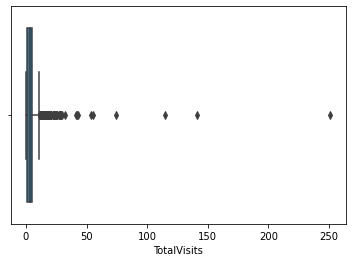

In [62]:
# TotalVisits is a continuous variable , so first checking for outliers
sns.boxplot(leads_df['TotalVisits'])

In [63]:
# There are outliers in TotalVisits, so we have to cap this variable to 95 percentile
Q1=leads_df['TotalVisits'].quantile(0.95)
leads_df['TotalVisits'][leads_df['TotalVisits']>Q1]=Q1

<AxesSubplot:xlabel='TotalVisits'>

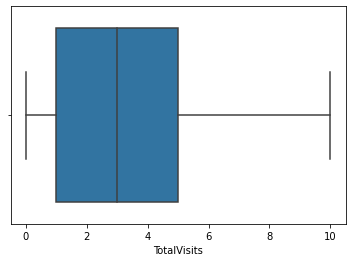

In [64]:
sns.boxplot(leads_df['TotalVisits'])

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

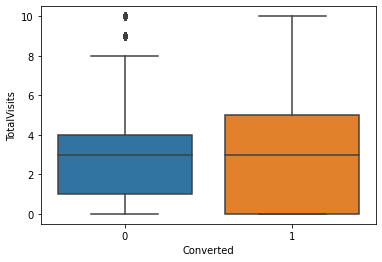

In [65]:
sns.boxplot(y='TotalVisits',x='Converted',data=leads_df)

## Obeservations
    1) There is no significant difference between converted and Not converted on the basis of TotalVisits.
    So we can not make any inferences with this variable

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

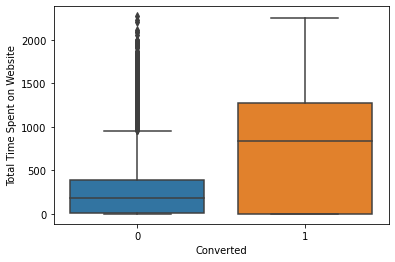

In [66]:
sns.boxplot(y=leads_df['Total Time Spent on Website'],x=leads_df['Converted'])
# no outliers in 'Total Time Spent on Website'

## Observation
    1) There is significant increase in conversion rate with Total Time Spent on Website.
    So website should be designed to be more attractive and informative , so that people spend more time and get more information and this will also help in increasing the conversion rate.

In [67]:
leads_df['Page Views Per Visit'].value_counts()

0.00    2291
2.00    1794
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

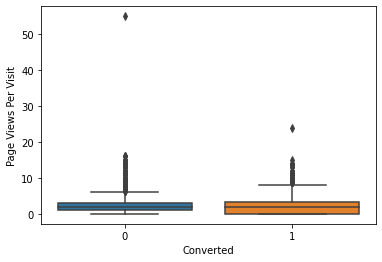

In [68]:
# Page Views Per Visit is a continuous variable, so first checking for outliers
sns.boxplot(y='Page Views Per Visit',x='Converted',data=leads_df)

In [69]:
# there are outliers, so capping outliers value to 99 percentile
Q1=leads_df['Page Views Per Visit'].quantile(0.99)
leads_df['Page Views Per Visit'][leads_df['Page Views Per Visit']>Q1]=Q1

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

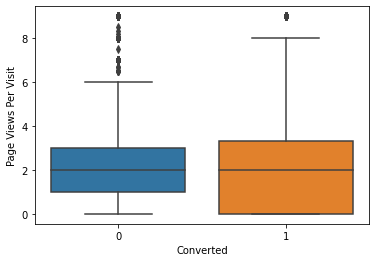

In [70]:
sns.boxplot(y='Page Views Per Visit',x='Converted',data=leads_df)

## Observations
    1) There is no significant difference between converted and Not converted on the basis of Page Views Per Visit.
So we can not make any inferences with this variable

In [71]:
leads_df['Last Activity'].value_counts(normalize=True)

Email Opened                    0.383855
SMS Sent                        0.295850
Olark Chat Conversation         0.105715
Page Visited on Website         0.069535
Converted to Lead               0.046502
Email Bounced                   0.034876
Email Link Clicked              0.029009
Form Submitted on Website       0.012603
Unreachable                     0.010104
Unsubscribed                    0.006410
Had a Phone Conversation        0.003259
Approached upfront              0.000978
View in browser link Clicked    0.000652
Email Received                  0.000217
Email Marked Spam               0.000217
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: Last Activity, dtype: float64

In [72]:
leads_df.groupby('Converted')['Last Activity'].value_counts(normalize=True)

Converted  Last Activity               
0          Email Opened                    0.388399
           SMS Sent                        0.179302
           Olark Chat Conversation         0.156735
           Page Visited on Website         0.086213
           Converted to Lead               0.065938
           Email Bounced                   0.052362
           Email Link Clicked              0.034203
           Form Submitted on Website       0.015515
           Unreachable                     0.010931
           Unsubscribed                    0.007934
           Had a Phone Conversation        0.001410
           View in browser link Clicked    0.000882
           Visited Booth in Tradeshow      0.000176
1          SMS Sent                        0.483012
           Email Opened                    0.376557
           Page Visited on Website         0.042752
           Olark Chat Conversation         0.023783
           Email Link Clicked              0.020668
           Converted to 

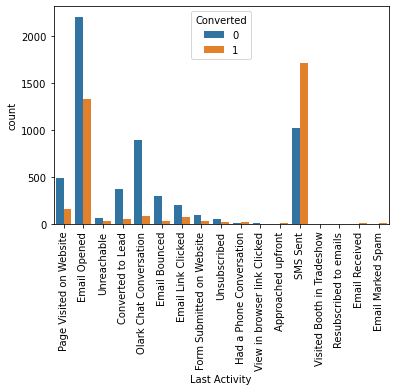

In [73]:
# Last Activity is categorical variable, so ploting countplot
sns.countplot('Last Activity',hue='Converted',data=leads_df)
plt.xticks(rotation=90)
plt.show()

In [74]:
# conveting the low count features into one feature named Other_Activities
leads_df['Last Activity']=leads_df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
'Visited Booth in Tradeshow', 'Approached upfront','Resubscribed to emails','Email Received', 'Email Marked Spam'],'Other_Activities')

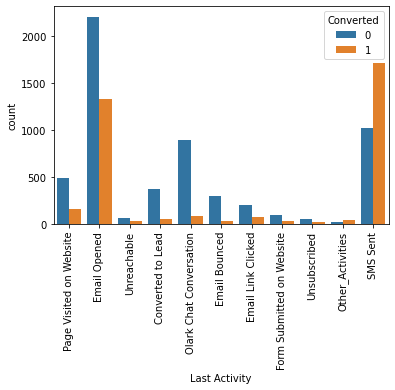

In [75]:
sns.countplot('Last Activity',hue='Converted',data=leads_df)
plt.xticks(rotation=90)
plt.show()

In [76]:
leads_df.groupby('Converted')['Last Activity'].value_counts(normalize=True)

Converted  Last Activity            
0          Email Opened                 0.388399
           SMS Sent                     0.179302
           Olark Chat Conversation      0.156735
           Page Visited on Website      0.086213
           Converted to Lead            0.065938
           Email Bounced                0.052362
           Email Link Clicked           0.034203
           Form Submitted on Website    0.015515
           Unreachable                  0.010931
           Unsubscribed                 0.007934
           Other_Activities             0.002468
1          SMS Sent                     0.483012
           Email Opened                 0.376557
           Page Visited on Website      0.042752
           Olark Chat Conversation      0.023783
           Email Link Clicked           0.020668
           Converted to Lead            0.015289
           Other_Activities             0.010476
           Unreachable                  0.008777
           Form Submitted on Web

## Observations
    1) SMS Sent & Email Opened have the maximum conversion rates (48% and 37% respectively)

In [77]:
leads_df['Country'].value_counts(normalize=True)

India                   0.968818
United States           0.007497
United Arab Emirates    0.005758
Singapore               0.002608
Saudi Arabia            0.002282
United Kingdom          0.001630
Australia               0.001412
Qatar                   0.001086
Hong Kong               0.000761
Bahrain                 0.000761
Oman                    0.000652
France                  0.000652
unknown                 0.000543
South Africa            0.000435
Nigeria                 0.000435
Germany                 0.000435
Kuwait                  0.000435
Canada                  0.000435
Sweden                  0.000326
China                   0.000217
Asia/Pacific Region     0.000217
Uganda                  0.000217
Bangladesh              0.000217
Italy                   0.000217
Belgium                 0.000217
Netherlands             0.000217
Ghana                   0.000217
Philippines             0.000217
Russia                  0.000109
Switzerland             0.000109
Vietnam   

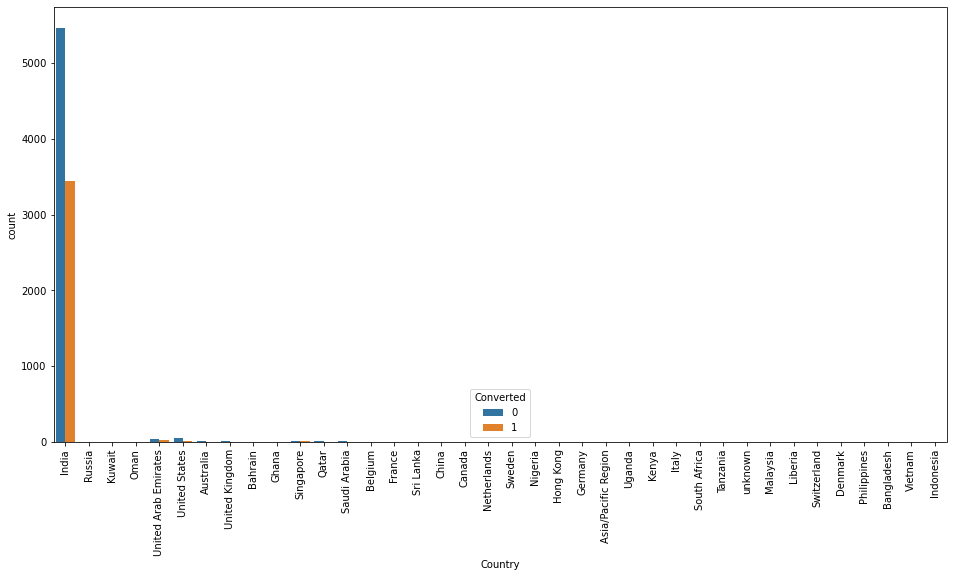

In [78]:
# Country is a coategorical variable, so ploting countplot
plt.figure(figsize=(16,8))
sns.countplot('Country',hue='Converted',data=leads_df)
plt.xticks(rotation=90)
plt.show()

In [79]:
leads_df['Specialization'].value_counts(normalize=True)

Other_Specialization                 0.364189
Finance Management                   0.105715
Human Resource Management            0.092025
Marketing Management                 0.090939
Operations Management                0.054542
Business Administration              0.043785
IT Projects Management               0.039765
Supply Chain Management              0.037918
Banking, Investment And Insurance    0.036723
Travel and Tourism                   0.022056
Media and Advertising                0.022056
International Business               0.019339
Healthcare Management                0.017166
Hospitality Management               0.012386
E-COMMERCE                           0.012060
Retail Management                    0.010865
Rural and Agribusiness               0.007931
E-Business                           0.006193
Services Excellence                  0.004346
Name: Specialization, dtype: float64

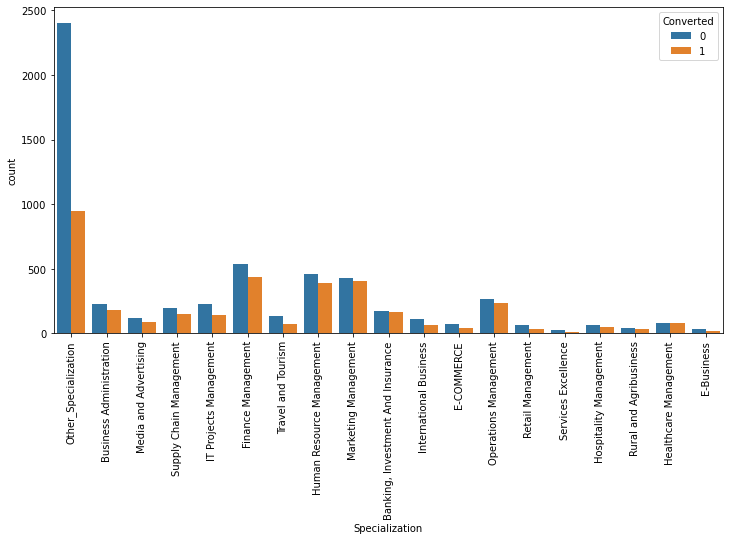

In [80]:
# Specialization is a categorical variable, so plotting countplot
plt.figure(figsize=(12,6))
sns.countplot('Specialization',hue='Converted',data=leads_df)
plt.xticks(rotation=90)
plt.show()

In [81]:
leads_df.groupby('Converted')['Specialization'].value_counts(normalize=True)

Converted  Specialization                   
0          Other_Specialization                 0.423836
           Finance Management                   0.095205
           Human Resource Management            0.081100
           Marketing Management                 0.075811
           Operations Management                0.046721
           IT Projects Management               0.039845
           Business Administration              0.039492
           Supply Chain Management              0.034908
           Banking, Investment And Insurance    0.030148
           Travel and Tourism                   0.023096
           Media and Advertising                0.020804
           International Business               0.020099
           Healthcare Management                0.014104
           E-COMMERCE                           0.012694
           Hospitality Management               0.011636
           Retail Management                    0.011636
           Rural and Agribusiness          

## Observations
  1) More than 26% of convertsion are from people with Other_Specialization, which provide no inferences about Specialization

In [82]:
leads_df['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.897110
Working Professional    0.076488
Student                 0.022708
Other                   0.001738
Housewife               0.001086
Businessman             0.000869
Name: What is your current occupation, dtype: float64

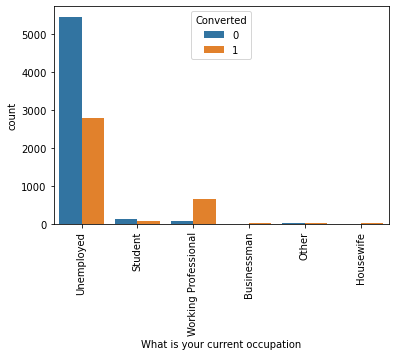

In [83]:
# What is your current occupation is a categorical variable, so plotting countplot for observation
plt.figure(figsize=(6,4))
sns.countplot('What is your current occupation',hue='Converted',data=leads_df)
plt.xticks(rotation=90)
plt.show()

In [84]:
leads_df.groupby('Converted')['What is your current occupation'].value_counts(normalize=True)

Converted  What is your current occupation
0          Unemployed                         0.964739
           Student                            0.023272
           Working Professional               0.010402
           Other                              0.001058
           Businessman                        0.000529
1          Unemployed                         0.788505
           Working Professional               0.182616
           Student                            0.021801
           Housewife                          0.002831
           Other                              0.002831
           Businessman                        0.001416
Name: What is your current occupation, dtype: float64

## Observations
    1) Working Professionals have high conversion rate.
    2) 89% of Total leads are coming from Unemployed and more than 78% of Total conversions are from Unemployed.

In [85]:
# checking some categorical columns fro which we have converted into binary from Yes & NO 
leads_df[['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
          'Through Recommendations','Update me on Supply Chain Content','Get updates on DM Content',
          'I agree to pay the amount through cheque','A free copy of Mastering The Interview']].describe()
# As these columns are in binary form , we don't get any inferences from these variables

,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9204.000000,9204.0,9204.000000,9204.000000,9204.000000,9204.000000,9204.000000,9204.0,9204.0,9204.0,9204.000000
mean,0.001521,0.0,0.000217,0.000109,0.000109,0.000435,0.000761,0.0,0.0,0.0,0.313777
std,0.038973,0.0,0.014740,0.010423,0.010423,0.020844,0.027569,0.0,0.0,0.0,0.464052
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000


In [86]:
leads_df['Receive More Updates About Our Courses'].value_counts()

0    9204
Name: Receive More Updates About Our Courses, dtype: int64

In [87]:
# Receive More Updates About Our Courses have only values 0, so it is not an important variable for observation

In [88]:
leads_df['Tags'].value_counts(normalize=True)

Will revert after reading the email                  0.586050
Ringing                                              0.130378
Interested in other courses                          0.055737
Already a student                                    0.050522
Closed by Horizzon                                   0.038896
switched off                                         0.026076
Busy                                                 0.020209
Lost to EINS                                         0.018905
Not doing further education                          0.015754
Interested  in full time MBA                         0.012712
Graduation in progress                               0.012060
invalid number                                       0.009018
Diploma holder (Not Eligible)                        0.006845
wrong number given                                   0.005106
opp hangup                                           0.003585
number not provided                                  0.002825
in touch

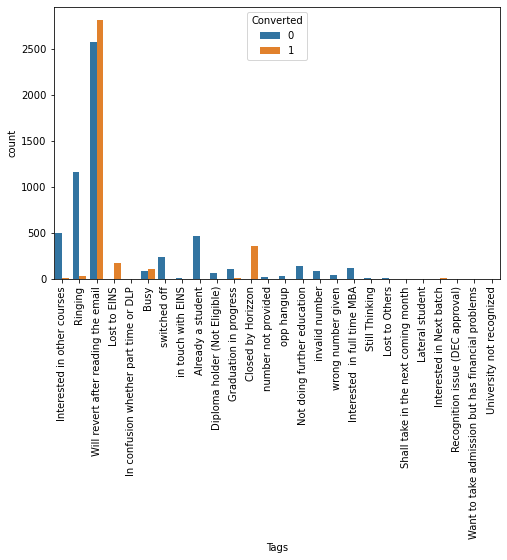

In [89]:
# Tags is a categorical variable, so ploting countplot
plt.figure(figsize=(8,5))
sns.countplot('Tags',hue='Converted',data=leads_df)
plt.xticks(rotation=90)
plt.show()

In [90]:
leads_df['Tags']=leads_df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS',
                                          'Diploma holder (Not Eligible)','Approached upfront','Graduation in progress',
                                          'number not provided', 'opp hangup','Still Thinking','Lost to Others',
                                          'Shall take in the next coming month','Lateral student','Interested in Next batch',
                                        'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                          'University not recognized'],'Other_Tags')

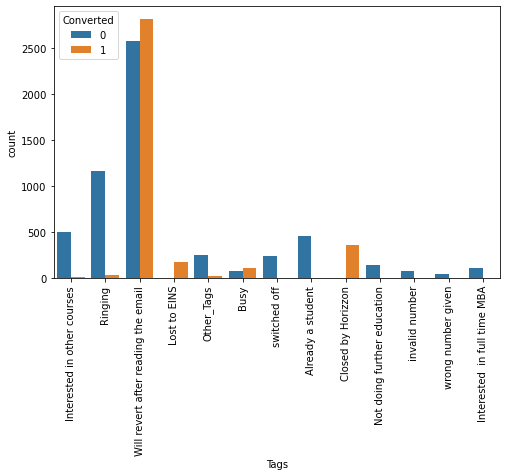

In [91]:
plt.figure(figsize=(8,5))
sns.countplot('Tags',hue='Converted',data=leads_df)
plt.xticks(rotation=90)
plt.show()

In [92]:
leads_df.groupby('Converted')['Tags'].value_counts(normalize=True)

Converted  Tags                               
0          Will revert after reading the email    0.454690
           Ringing                                0.205571
           Interested in other courses            0.088152
           Already a student                      0.081453
           Other_Tags                             0.044958
           switched off                           0.041608
           Not doing further education            0.025388
           Interested  in full time MBA           0.020099
           invalid number                         0.014457
           Busy                                   0.014281
           wrong number given                     0.008286
           Lost to EINS                           0.000705
           Closed by Horizzon                     0.000353
1          Will revert after reading the email    0.796999
           Closed by Horizzon                     0.100793
           Lost to EINS                           0.048131
         

## Observations
    1) 'Will revert after reading the email' & 'Ringing' have the highest conversion rates (79% and 10% respectively)

## Overall Summary from Exploratory Data Analysis
 1) Google & Direct Traffic have highest conversion rates (32% & 23% respectively).Reference , Olark Chat, 
    Organic Search and Welingak Website have less counts but conversion rates are high. So we need to focus 
    on these Lead Sources to improve the conversion rate.
    
 2) Landing Page Submission & API have conversion rate more than 30 % ( 50% & 31% respectively).
    Lead Add Form has low counts but conversion rate in high as compare to counts.
    So we have to focus on Landing Page Submission & API & Lead Add Form for increase in conversion rates.
    
 3) SMS Sent & Email Opened have the maximum conversion rates (48% and 37% respectively).
    So we have to focus to increase conversion rate from SMS Sent & Email Opened.
    
 4) Working Professionals have high conversion rate.89% of Total leads are comming from Unemployed and more than
    78% of Total conversions are from Unemployed. So we have to focus on Working Professionals and Unemployed to
    incraese the conversion rate.

### Dropping Unnecessary variables from our Dataset

In [93]:
leads_df=leads_df.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums',
                        'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                        'Update me on Supply Chain Content','Get updates on DM Content',
                        'I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country',
                        'Do Not Call'],axis=1)

In [94]:
leads_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


## Creating Dummy variables

In [95]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9204 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9204 non-null   object 
 1   Lead Origin                      9204 non-null   object 
 2   Lead Source                      9204 non-null   object 
 3   Do Not Email                     9204 non-null   int64  
 4   Converted                        9204 non-null   int64  
 5   TotalVisits                      9204 non-null   float64
 6   Total Time Spent on Website      9204 non-null   int64  
 7   Page Views Per Visit             9204 non-null   float64
 8   Last Activity                    9204 non-null   object 
 9   Specialization                   9204 non-null   object 
 10  What is your current occupation  9204 non-null   object 
 11  Tags                             9204 non-null   object 
 12  Lead Quality        

In [96]:
leads_df.select_dtypes(include='object').columns
dummies=pd.get_dummies(leads_df[['Lead Origin', 'Lead Source', 'Last Activity','Specialization', 
                                 'What is your current occupation', 'Tags','Lead Quality', 'City', 'Last Notable Activity']],drop_first=True)

In [97]:
dummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [98]:
# dropping columns from dataset for which we have created Dummies
leads_df=leads_df.drop(['Lead Origin', 'Lead Source', 'Last Activity','Specialization', 
                                 'What is your current occupation', 'Tags','Lead Quality', 'City', 'Last Notable Activity'],axis=1)

In [99]:
# concatenating dataset with dummies
leads_df=pd.concat([leads_df,dummies],axis=1)

In [100]:
leads_df.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [101]:
leads_df.shape

(9204, 86)

In [102]:
leads_df.columns

Index(['Prospect ID', 'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Other_Sources', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Activities',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Man

## Spliting the data into Train-Test sets

In [103]:
y=leads_df.pop('Converted')

In [104]:
X=leads_df.drop('Prospect ID',axis=1)

In [105]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

## Feature Scaling

In [106]:
scaler=StandardScaler() # Intantiating standard scaler

In [107]:
col=leads_df.select_dtypes(include=['float','int']).columns
leads_df.select_dtypes(include=['float','int']).columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

In [108]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [109]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [110]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2835,0,-0.055997,1.892235,0.342805,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3088,0,-0.055997,-0.469942,0.342805,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8413,0,0.665470,1.919830,1.349689,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5015,0,-0.055997,1.459905,0.342805,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5166,0,-1.138199,-0.896752,-1.167522,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


<AxesSubplot:>

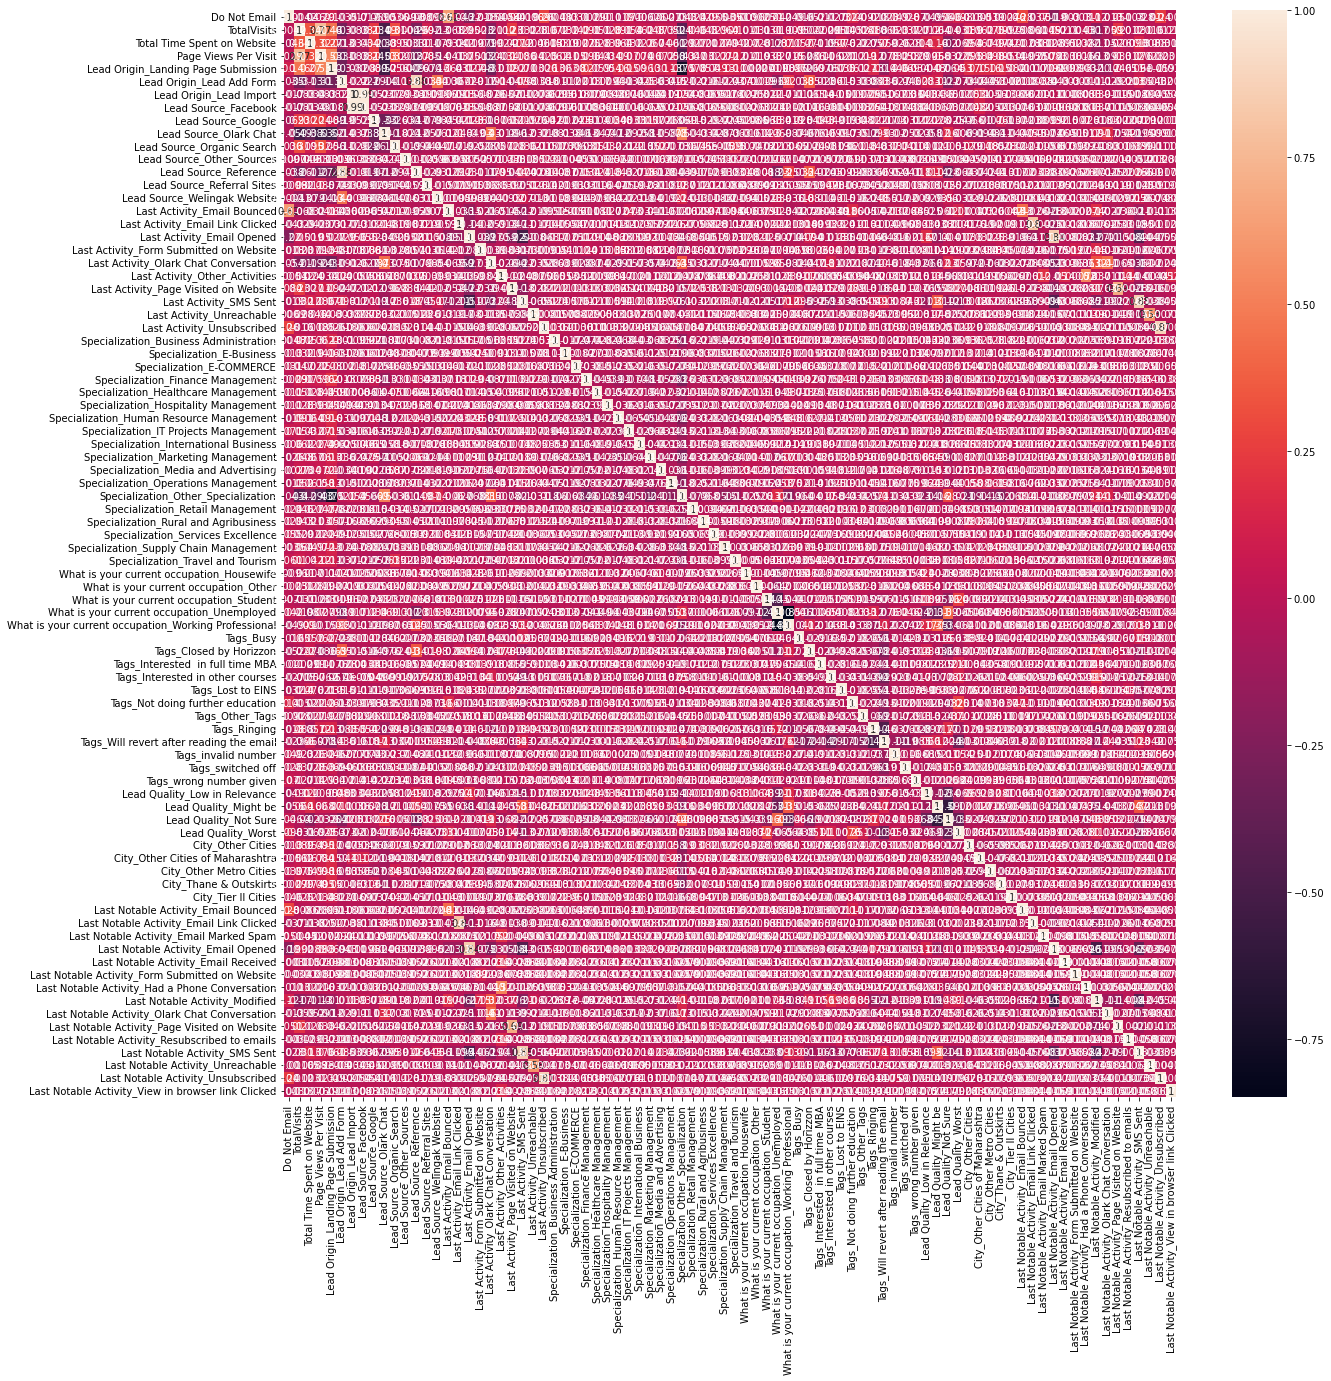

In [111]:
plt.figure(figsize=(20,20))
sns.heatmap(leads_df.corr(),annot=True)

In [112]:
leads_df.corr()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Do Not Email,1.000000,0.004233,-0.046358,0.029045,0.100737,-0.034910,-0.017102,-0.017358,-0.068988,-0.049900,0.036144,0.009705,-0.037760,-0.009754,-0.000406,0.618989,-0.043163,-0.222627,-0.018439,-0.054208,-0.005420,0.084038,-0.018877,0.006933,0.260313,0.004804,0.013065,0.030764,-0.002920,0.011278,0.011223,-0.018675,0.071036,0.006038,-0.026111,0.000270,-0.013042,-0.042502,0.024052,0.028634,0.054503,0.003516,0.060840,-0.009615,-0.002459,0.007133,0.041503,-0.048910,-0.016007,-0.052375,-0.011425,-0.026766,-0.031562,0.141713,0.009172,-0.018016,-0.023431,0.049182,0.028417,0.069881,-0.049253,-0.056289,0.045590,0.098072,0.012720,-0.005070,0.039297,-0.002703,0.046197,0.277853,-0.037373,0.050569,-0.186897,-0.003039,-0.003039,-0.011379,0.118060,-0.012558,0.051119,-0.003039,-0.028257,-0.010351,0.240430,-0.003039
TotalVisits,0.004233,1.000000,0.340979,0.772211,0.463725,-0.298704,-0.082676,-0.081493,0.225551,-0.491701,0.305872,0.000487,-0.262601,0.091518,-0.133463,-0.068462,-0.028622,0.049584,0.022711,-0.213794,0.011826,0.227044,0.031978,0.027818,0.016290,0.071815,0.032125,0.042049,0.091459,0.051277,0.028299,0.091146,0.053534,0.062256,0.048028,0.072802,0.051912,-0.401926,0.046386,0.043205,0.028530,0.064058,0.100149,-0.011206,0.030563,-0.031326,0.018739,-0.008999,0.050074,-0.021892,0.000288,-0.004980,0.014161,0.005235,0.008056,0.087879,-0.065690,0.023436,0.036892,0.02740

In [113]:
# Correlation between different numerical variables for both the Converted and not-converted cases
conv_corr = leads_df.corr()

# Unstacking the correlation matrix to find out top correlations
conv_corr_unstacked = conv_corr.unstack().sort_values(kind="quicksort")
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(30)

Lead Origin_Lead Import                               Lead Source_Facebook                              0.990813
Lead Origin_Lead Add Form                             Lead Source_Reference                             0.875206
Last Activity_Unsubscribed                            Last Notable Activity_Unsubscribed                0.872666
Last Activity_SMS Sent                                Last Notable Activity_SMS Sent                    0.852241
Last Activity_Email Opened                            Last Notable Activity_Email Opened                0.842692
Last Activity_Email Link Clicked                      Last Notable Activity_Email Link Clicked          0.800747
TotalVisits                                           Page Views Per Visit                              0.772211
Last Activity_Page Visited on Website                 Last Notable Activity_Page Visited on Website     0.692004
Do Not Email                                          Last Activity_Email Bounced               

In [114]:
# Dropping the columns having correlation factor >=0.5
X_train=X_train.drop(['Lead Source_Facebook','Lead Origin_Lead Add Form','Last Notable Activity_Unsubscribed',
                     'Last Notable Activity_SMS Sent','Last Notable Activity_Email Opened','Last Notable Activity_Email Link Clicked',
                     'Page Views Per Visit','Last Notable Activity_Page Visited on Website','Last Activity_Email Bounced',
                     'Last Notable Activity_Unreachable','Lead Origin_Landing Page Submission','Last Notable Activity_Had a Phone Conversation',
                     'Specialization_Other_Specialization'],axis=1)
X_test=X_test.drop(['Lead Source_Facebook','Lead Origin_Lead Add Form','Last Notable Activity_Unsubscribed',
                     'Last Notable Activity_SMS Sent','Last Notable Activity_Email Opened','Last Notable Activity_Email Link Clicked',
                     'Page Views Per Visit','Last Notable Activity_Page Visited on Website','Last Activity_Email Bounced',
                     'Last Notable Activity_Unreachable','Lead Origin_Landing Page Submission','Last Notable Activity_Had a Phone Conversation',
                     'Specialization_Other_Specialization'],axis=1)

In [115]:
conv_corr = X_train.corr()

In [116]:
# Unstacking the correlation matrix to find out top correlations
conv_corr_unstacked = conv_corr.unstack().sort_values(kind="quicksort")
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head()

Lead Source_Olark Chat                                Last Activity_Olark Chat Conversation            0.417337
Last Activity_Olark Chat Conversation                 Last Notable Activity_Olark Chat Conversation    0.409164
What is your current occupation_Unemployed            Lead Quality_Not Sure                            0.388258
Lead Source_Reference                                 Tags_Closed by Horizzon                          0.371417
What is your current occupation_Working Professional  Lead Quality_Might be                            0.338784
dtype: float64

## Building Logistic Regression Model

In [117]:
logm1=sm.GLM(y_train,sm.add_constant(X_train),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6370
Model Family:                Binomial   Df Model:                           71
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1341.1
Date:                Tue, 18 Oct 2022   Deviance:                       2682.2
Time:                        01:28:11   Pearson chi2:                 3.75e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9938      1.636     -0.607      0.544      -4.201       2.214
Do Not Email                                            -1.4147      0.278     -5.094      0.000      -1.959      -0.870
TotalVisits                                              0.0096      0.071      0.135      0.892      -0.129       0.149
Total Time Spent on Website                              1.1025      0.061     18.073      0.000       0.983       1.222
Lead Origin_Lead Import                                  0.5891      0.669      0.880      0.379      -0.723       1.901
Lead Source_Google                                       0.2215      0.144      1.539      0.124      -0.061       0.504
Lead Source_Olark Chat                                   1.2662      0.202      6.276      0.000       0.871       1.662
Lead Source_Organic Search                               0.3718      0.191      1.950      0.051      -0.002       0.745
Lead Source_Other_Sources                                0.6868      0.754      0.911      0.362      -0.791       2.165
Lead Source_Reference                                    1.6368      0.376      4.357      0.000       0.901       2.373
Lead Source_Referral Sites                               0.0544      0.441      0.123      0.902      -0.810       0.919
Lead Source_Welingak Website                             6.0777      1.033      5.886      0.000       4.054       8.101
Last Activity_Email Link Clicked                        -0.6155      0.445     -1.385      0.166      -1.487       0.256
Last Activity_Email Opened                               0.0101      0.328      0.031      0.975      -0.633       0.653
Last Activity_Form Submitted on Website                  0.6884      0.562      1.224      0.221      -0.414       1.790
Last Activity_Olark Chat Conversation                   -0.1610      0.372     -0.433      0.665      -0.890       0.569
Last Activity_Other_Activities                           0.6915      0.940      0.735      0.462      -1.151       2.534
Last Activity_Page Visited on Website                   -0.1659      0.378     -0.438      0.661      -0.908       0.576
Last Activity_SMS Sent                                   1.9179      0.321      5.979      0.000       1.289       2.547
Last Activity_Unreachable                                0.7498      0.615      1.220      0.222      -0.455       1.954
Last Activity_Unsubscribed                               1.2610      0.680      1.855      0.064      -0.071       2.593
Specialization_Business Administration                  -0.0296      0.273     -0.108      0.914      -0.565       0.506
Specialization_E-Business                               -0

## Feature Selection using RFE

In [118]:
# selecting 15 features in RFE
logreg=LogisticRegression()
rfe=RFE(logreg,15)

In [119]:
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [120]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', False, 2),
 ('TotalVisits', False, 57),
 ('Total Time Spent on Website', False, 4),
 ('Lead Origin_Lead Import', False, 22),
 ('Lead Source_Google', False, 41),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', False, 34),
 ('Lead Source_Other_Sources', False, 23),
 ('Lead Source_Reference', False, 3),
 ('Lead Source_Referral Sites', False, 51),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Link Clicked', False, 15),
 ('Last Activity_Email Opened', False, 48),
 ('Last Activity_Form Submitted on Website', False, 13),
 ('Last Activity_Olark Chat Conversation', False, 21),
 ('Last Activity_Other_Activities', False, 12),
 ('Last Activity_Page Visited on Website', False, 32),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 11),
 ('Last Activity_Unsubscribed', False, 6),
 ('Specialization_Business Administration', False, 56),
 ('Specialization_E-Business', False, 47),
 ('Specialization_E-COMMERCE', False,

In [121]:
col=X_train.columns[rfe.support_]

In [122]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Other_Sources', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Activities',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
  

### Assessing the model with StatsModels

In [123]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6426
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1593.7
Date:                Tue, 18 Oct 2022   Deviance:                       3187.4
Time:                        01:28:20   Pearson chi2:                 3.47e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.0026      0.223     -4.490      0.000      -1.440      -0.565
Lead Source_Welingak Website                      4.9733      1.025      4.854      0.000       2.965       6.982
Last Activity_SMS Sent                            1.9353      0.101     19.206      0.000       1.738       2.133
Tags_Busy                                         4.1018      0.325     12.623      0.000       3.465       4.739
Tags_Closed by Horizzon                           9.6056      1.047      9.170      0.000       7.553      11.659
Tags_Lost to EINS                                 9.5158      0.763     12.466      0.000       8.020      11.012
Tags_Not doing further education                -21.6153   1.83e+04     -0.001      0.999   -3.59e+04    3.58e+04
Tags_Ringing                                     -1.8259      0.320     -5.700      0.000      -2.454      -1.198
Tags_Will revert after reading the email          3.7281      0.241     15.500      0.000       3.257       4.200
Tags_invalid number                              -2.1375      1.118     -1.911      0.056      -4.329       0.054
Tags_switched off                                -2.5412      0.589     -4.315      0.000      -3.695      -1.387
Tags_wrong number given                         -23.5202   2.97e+04     -0.001      0.999   -5.83e+04    5.82e+04
Lead Quality_Not Sure                            -3.7392      0.129    -28.874      0.000      -3.993      -3.485
Lead Quality_Worst                               -3.5639      0.714     -4.991      0.000      -4.963      -2.164
Last Notable Activity_Modified                   -1.6816      0.105    -16.022      0.000      -1.887      -1.476
Last Notable Activity_Olark Chat Conversation    -1.7016      0.398     -4.278      0.000      -2.481      -0.922
=================================================================================================================
"""

In [124]:
# using model for prediction of y
y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

2835    9.906307e-01
3088    2.613492e-04
8413    7.850517e-01
5015    7.153860e-01
5166    6.207849e-02
5857    1.028737e-02
7208    9.998165e-01
5925    1.179749e-13
5984    1.027831e-03
2398    6.390979e-02
dtype: float64

In [125]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([9.90630679e-01, 2.61349160e-04, 7.85051727e-01, 7.15386046e-01,
       6.20784871e-02, 1.02873748e-02, 9.99816481e-01, 1.17974924e-13,
       1.02783116e-03, 6.39097853e-02])

In [126]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,1,0.990631,2835
1,0,0.000261,3088
2,1,0.785052,8413
3,1,0.715386,5015
4,0,0.062078,5166


In [127]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,1,0.990631,2835,1
1,0,0.000261,3088,0
2,1,0.785052,8413,1
3,1,0.715386,5015,1
4,0,0.062078,5166,0


In [128]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3815  150]
 [ 361 2116]]


In [129]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9206768084445824


In [130]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Tags_Busy,1.11
5,Tags_Not doing further education,1.11
9,Tags_switched off,1.11
3,Tags_Closed by Horizzon,1.08
4,Tags_Lost to EINS,1.06
0,Lead Source_Welingak Website,1.05
14,Last Notable Activity_Olark Chat Conversation,1.05
8,Tags_invalid number,1.03
10,Tags_wrong number given,1.02
12,Lead Quality_Worst,0.45


In [131]:
# 'Tags_Not doing further education' & 'Tags_wrong number given' have high p-values, so dropping these columns from model

In [132]:
col=col.drop(['Tags_wrong number given','Tags_Not doing further education'])

In [133]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6428
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1599.7
Date:                Tue, 18 Oct 2022   Deviance:                       3199.5
Time:                        01:28:21   Pearson chi2:                 3.49e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2100      0.219     -5.515      0.000      -1.640      -0.780
Lead Source_Welingak Website                      4.9710      1.024      4.852      0.000       2.963       6.979
Last Activity_SMS Sent                            1.9280      0.100     19.194      0.000       1.731       2.125
Tags_Busy                                         4.3105      0.322     13.381      0.000       3.679       4.942
Tags_Closed by Horizzon                           9.8039      1.047      9.364      0.000       7.752      11.856
Tags_Lost to EINS                                 9.7131      0.763     12.734      0.000       8.218      11.208
Tags_Ringing                                     -1.6128      0.317     -5.090      0.000      -2.234      -0.992
Tags_Will revert after reading the email          3.9344      0.237     16.580      0.000       3.469       4.399
Tags_invalid number                              -1.9273      1.117     -1.726      0.084      -4.116       0.261
Tags_switched off                                -2.3273      0.587     -3.965      0.000      -3.478      -1.177
Lead Quality_Not Sure                            -3.7383      0.129    -28.901      0.000      -3.992      -3.485
Lead Quality_Worst                               -3.5302      0.714     -4.947      0.000      -4.929      -2.132
Last Notable Activity_Modified                   -1.6725      0.105    -15.957      0.000      -1.878      -1.467
Last Notable Activity_Olark Chat Conversation    -1.6969      0.398     -4.265      0.000      -2.477      -0.917
=================================================================================================================
"""

In [134]:
# using model for prediction of y
y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

2835    0.990551
3088    0.000266
8413    0.784197
5015    0.713846
5166    0.062337
5857    0.008661
7208    0.999815
5925    0.001638
5984    0.001032
2398    0.053026
dtype: float64

In [135]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([9.90551355e-01, 2.65536575e-04, 7.84197294e-01, 7.13846260e-01,
       6.23372185e-02, 8.66141581e-03, 9.99814807e-01, 1.63796782e-03,
       1.03168721e-03, 5.30260361e-02])

In [136]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,1,0.990551,2835
1,0,0.000266,3088
2,1,0.784197,8413
3,1,0.713846,5015
4,0,0.062337,5166


In [137]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [138]:
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,1,0.990551,2835,1
1,0,0.000266,3088,0
2,1,0.784197,8413,1
3,1,0.713846,5015,1
4,0,0.062337,5166,0


In [139]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3813  152]
 [ 361 2116]]


In [140]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9203663458553244


In [141]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Tags_Busy,1.11
8,Tags_switched off,1.11
3,Tags_Closed by Horizzon,1.08
4,Tags_Lost to EINS,1.06
0,Lead Source_Welingak Website,1.05
12,Last Notable Activity_Olark Chat Conversation,1.05
7,Tags_invalid number,1.03
10,Lead Quality_Worst,0.42
9,Lead Quality_Not Sure,0.18
6,Tags_Will revert after reading the email,0.15


In [142]:
# 'Tags_invalid number' has high p-value, so dropping this column
col=col.drop(['Tags_invalid number'])

In [143]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6429
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1601.9
Date:                Tue, 18 Oct 2022   Deviance:                       3203.8
Time:                        01:28:23   Pearson chi2:                 3.47e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.3164      0.217     -6.059      0.000      -1.742      -0.891
Lead Source_Welingak Website                      4.9680      1.024      4.850      0.000       2.961       6.976
Last Activity_SMS Sent                            1.9130      0.100     19.137      0.000       1.717       2.109
Tags_Busy                                         4.4223      0.320     13.827      0.000       3.795       5.049
Tags_Closed by Horizzon                           9.9054      1.047      9.464      0.000       7.854      11.957
Tags_Lost to EINS                                 9.8163      0.762     12.878      0.000       8.322      11.310
Tags_Ringing                                     -1.4939      0.314     -4.760      0.000      -2.109      -0.879
Tags_Will revert after reading the email          4.0426      0.235     17.204      0.000       3.582       4.503
Tags_switched off                                -2.2073      0.585     -3.772      0.000      -3.354      -1.060
Lead Quality_Not Sure                            -3.7364      0.129    -28.919      0.000      -3.990      -3.483
Lead Quality_Worst                               -3.5815      0.714     -5.016      0.000      -4.981      -2.182
Last Notable Activity_Modified                   -1.6678      0.105    -15.923      0.000      -1.873      -1.463
Last Notable Activity_Olark Chat Conversation    -1.6983      0.398     -4.268      0.000      -2.478      -0.918
=================================================================================================================
"""

In [144]:
# using model for prediction of y
y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

2835    0.990427
3088    0.000271
8413    0.782878
5015    0.711531
5166    0.062471
5857    0.007407
7208    0.999814
5925    0.001406
5984    0.006351
2398    0.048142
dtype: float64

In [145]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([9.90427386e-01, 2.70599778e-04, 7.82877978e-01, 7.11531306e-01,
       6.24706498e-02, 7.40654984e-03, 9.99813882e-01, 1.40573082e-03,
       6.35068434e-03, 4.81420788e-02])

In [146]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,1,0.990427,2835
1,0,0.000271,3088
2,1,0.782878,8413
3,1,0.711531,5015
4,0,0.062471,5166


In [147]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [148]:
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,1,0.990427,2835,1
1,0,0.000271,3088,0
2,1,0.782878,8413,1
3,1,0.711531,5015,1
4,0,0.062471,5166,0


In [149]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3810  155]
 [ 361 2116]]


In [150]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9199006519714374


In [151]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Tags_Busy,1.11
7,Tags_switched off,1.10
3,Tags_Closed by Horizzon,1.08
4,Tags_Lost to EINS,1.06
0,Lead Source_Welingak Website,1.05
11,Last Notable Activity_Olark Chat Conversation,1.05
9,Lead Quality_Worst,0.42
8,Lead Quality_Not Sure,0.18
6,Tags_Will revert after reading the email,0.14
5,Tags_Ringing,0.13


### For model logm4 p-values are very low for all variables and VIFs are also very low. So it is our final model

In [152]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3810,  155],
       [ 361, 2116]], dtype=int64)

In [153]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9199006519714374

In [154]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [155]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8542591844973758

In [156]:
# Let us calculate specificity
TN / float(TN+FP)

0.9609079445145019

In [157]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.03909205548549811


In [158]:
# positive predictive value 
print (TP / float(TP+FP))

0.931748128577719


In [159]:
# Negative predictive value
print (TN / float(TN+ FN))

0.913450011987533


## Plotting the ROC Curve

In [160]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [161]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

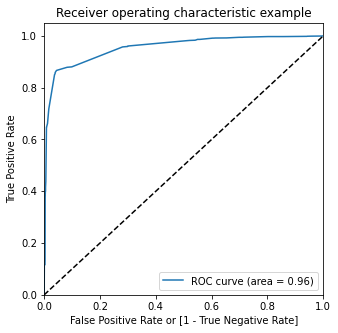

In [162]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [163]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.990427,2835,1,1,1,1,1,1,1,1,1,1,1
1,0,0.000271,3088,0,1,0,0,0,0,0,0,0,0,0
2,1,0.782878,8413,1,1,1,1,1,1,1,1,1,0,0
3,1,0.711531,5015,1,1,1,1,1,1,1,1,1,0,0
4,0,0.062471,5166,0,1,0,0,0,0,0,0,0,0,0


In [164]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384508  1.000000  0.000000
0.1   0.1  0.800373  0.959225  0.701135
0.2   0.2  0.803322  0.958821  0.706179
0.3   0.3  0.902980  0.878886  0.918033
0.4   0.4  0.921453  0.858700  0.960656
0.5   0.5  0.919901  0.854259  0.960908
0.6   0.6  0.919901  0.854259  0.960908
0.7   0.7  0.919745  0.850626  0.962926
0.8   0.8  0.859205  0.647154  0.991677
0.9   0.9  0.859360  0.647154  0.991929


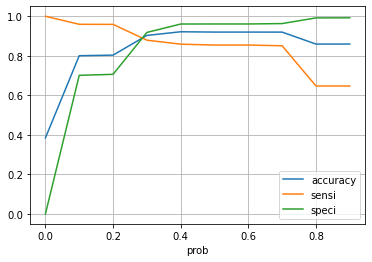

In [165]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.grid()
plt.show()

### From the curve above, 0.28 is the optimum point to take it as a cutoff probability

In [166]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.28 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.990427,2835,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.000271,3088,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.782878,8413,1,1,1,1,1,1,1,1,1,0,0,1
3,1,0.711531,5015,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.062471,5166,0,1,0,0,0,0,0,0,0,0,0,0


In [167]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8932008692952499

In [168]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3573,  392],
       [ 296, 2181]], dtype=int64)

In [169]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [170]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8805006055712555

In [171]:
# Let us calculate specificity
TN / float(TN+FP)

0.9011349306431273

In [172]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.09886506935687264


In [173]:
# Positive predictive value 
print (TP / float(TP+FP))

0.84764865915274


In [174]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9234944430085293


### Precision and Recall tradeoff

In [175]:
from sklearn.metrics import precision_recall_curve

In [176]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       1
 3       1
 4       0
        ..
 6437    0
 6438    1
 6439    1
 6440    0
 6441    1
 Name: Converted, Length: 6442, dtype: int64,
 0       1
 1       0
 2       1
 3       1
 4       0
        ..
 6437    0
 6438    1
 6439    1
 6440    0
 6441    1
 Name: predicted, Length: 6442, dtype: int64)

In [177]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

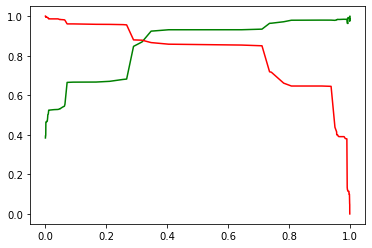

In [178]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### from Presion and Recall curve , optimum point is 0.28 , same as what we get from ROC curve

## Making predictions on the test set

In [179]:
X_test = X_test[col]
X_test.head()

,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
76,0,0,0,0,0,0,1,0,0,0,0,0
5304,0,1,0,0,0,0,1,0,0,0,0,0
2092,0,1,1,0,0,0,0,0,0,0,1,0
582,0,0,0,0,0,0,1,0,0,0,0,0
93,0,0,0,0,0,0,1,0,1,0,0,0


In [180]:
X_test_sm = sm.add_constant(X_test)

In [181]:
# Making prwediction on test data
y_test_pred = res.predict(X_test_sm)

In [182]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [183]:
# Let's see the head
y_pred_1.head()

,0
76,0.938554
5304,0.990427
2092,0.966140
582,0.938554
93,0.266938


In [184]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [185]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [186]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [187]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [188]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [189]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_Prob']]

In [190]:
y_pred_final

,Prospect ID,Converted,Converted_Prob
0,76,1,0.938554
1,5304,1,0.990427
2,2092,0,0.966140
3,582,1,0.938554
4,93,0,0.266938
...,...,...,...
2757,7623,0,0.064281
2758,220,1,0.999014
2759,8481,0,0.064281
2760,8929,0,0.001204


In [191]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.28 else 0)

In [192]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,76,1,0.938554,1
1,5304,1,0.990427,1
2,2092,0,0.966140,1
3,582,1,0.938554,1
4,93,0,0.266938,0


In [193]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8921071687183201

In [194]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1540,  167],
       [ 131,  924]], dtype=int64)

In [195]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [196]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.875829383886256

In [197]:
# Let us calculate specificity
TN / float(TN+FP)

0.9021675454012889

In [198]:
# precision
TP/ float(TP+FP)

0.846929422548121

## feature of our Model

In [199]:
print(res.params)

const                                           -1.316424
Lead Source_Welingak Website                     4.968015
Last Activity_SMS Sent                           1.913047
Tags_Busy                                        4.422293
Tags_Closed by Horizzon                          9.905369
Tags_Lost to EINS                                9.816265
Tags_Ringing                                    -1.493942
Tags_Will revert after reading the email         4.042608
Tags_switched off                               -2.207254
Lead Quality_Not Sure                           -3.736397
Lead Quality_Worst                              -3.581532
Last Notable Activity_Modified                  -1.667835
Last Notable Activity_Olark Chat Conversation   -1.698337
dtype: float64


# Conclusion

## Top features contributing most towards the probability

In [200]:
features=res.params
features=100*(features/features.max())
features.sort_values(ascending=False).nlargest(10)

Tags_Closed by Horizzon                          100.000000
Tags_Lost to EINS                                 99.100440
Lead Source_Welingak Website                      50.154764
Tags_Busy                                         44.645408
Tags_Will revert after reading the email          40.812290
Last Activity_SMS Sent                            19.313228
const                                            -13.290008
Tags_Ringing                                     -15.082148
Last Notable Activity_Modified                   -16.837684
Last Notable Activity_Olark Chat Conversation    -17.145625
dtype: float64

In [201]:
#Sorting the feature variables based on their relative coefficient values
sorted_idx = np.argsort(features,kind='quicksort',order='list of str')
sorted_idx

const                                             9
Lead Source_Welingak Website                     10
Last Activity_SMS Sent                            8
Tags_Busy                                        12
Tags_Closed by Horizzon                          11
Tags_Lost to EINS                                 6
Tags_Ringing                                      0
Tags_Will revert after reading the email          2
Tags_switched off                                 7
Lead Quality_Not Sure                             3
Lead Quality_Worst                                1
Last Notable Activity_Modified                    5
Last Notable Activity_Olark Chat Conversation     4
dtype: int64